## Problem Statement:-
#### In this project, built Deep learning models to recognize expressions and attributes of celebrities in the images by trying 3 different ways:

#### Part -1) Build own CNN model from scratch (In this Notebook)
#### Part -2) Apply data augmentation to generate new images and then build and analyze same model used in part-1
#### Part -3) Build a model using transfer learning with the help of State-of-art model

#### Dataset used in this project is great for training and testing models for face detection, particularly for recognising facial attributes such as finding people with brown hair, are smiling, or wearing glasses. 
#### However, this project is scoped to recognizing 3 facial attributes : 1) Heavy Makeup 2) Male 3) Smiling

#### This file contains part-1 of the project

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, LeakyReLU
from tqdm import tqdm
import matplotlib.pyplot as plt

### Data Loading

In [2]:
# 'list_attr_celeba.csv' has various labels for multi-label classification problem
# Out of which selected 3 labels - Heavy_makeup , Male, Smile
# Model will try to identify whether celebrity in the image:
# 1) is male or not 2) has smile or not 3) has applied heavy_makeup or not

data = pd.read_csv("list_attr_celeba.csv", usecols=['image_id','Male','Heavy_Makeup','Smiling'])

In [3]:
#All images have different size. Therefore, setting size of all images 224 X 224
img_width = 224
img_height = 224

In [4]:
#Dataset has orignially 20000 images. However for this project, selected 2000 images. 
data = data[:2000]

In [5]:
#Creating array 'X' which contains 2000 images in numpy array format
X = []
for i in tqdm(range(data.shape[0])):
    path = '/img_align_celeba/images/' + data['image_id'][i]
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)  #Converting image to array
    img = img/255.0     #Normalization
    X.append(img)
    
X = np.array(X)

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 945.17it/s]


In [6]:
# Creating array 'y' which contains labels for all 2000 images in numpy array format
y = []
for i in tqdm(range(data.shape[0])):
    row = data.iloc[i].values
    row = row[1:]
    y.append(row)
    
y = np.array(y)
y = np.asarray(y).astype('float32')


100%|███████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 12699.99it/s]


#### Spliting data into train and test set 

In [7]:
#Creating training and testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state=46)


### Model Training


Created Architecture of CNN Model in below cell.

1) 3 Convolution Layers - to extract knowledge from images

2) 3 MaxPooling2D Layers - to reduce dimensions

3) 3 dropout layers - for regularization and to tackle overfitting

4) 3 BatchNormalization layers - to normalize data so that model can converge

5) Flatten Layer - Convert 2D input to 1D input because Dense layers can only take 1D input

6) 4 Hidden Dense Layers and 1 Output Layer


In [8]:
#Build CNN model using tensorflow Sequential model

model = Sequential()
model.add(Conv2D(128, (3,3), activation ='relu', input_shape= X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(600, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(400, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = LeakyReLU(alpha=0.05)))


model.add(Dense(3, activation='sigmoid'))  #Output layer

Selected sigmoid activation function and 3 nodes in output layer because there are 3 attributes to predict. And Sigmoid function will provide probability of each node that means probability of each attribute (Heavy Makeup, Male, Smile)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 128)    5

loss = 'loss' parameter specifies Loss function that we want to use. Loss function simply calculate error between predicted label and actual label in each iteration. We want to reduce loss.

optimizer = optimizer helps and guide model to reduce loss while doing back-propogation

metrics = Takes performance measure we want to use. Here, selected accuracy

In [10]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test))

Epoch 1/6
44/44 [==============================] - 304s 7s/step - loss: -4.0364 - accuracy: 0.3893 - val_loss: -4.4945 - val_accuracy: 0.3700
Epoch 2/6
44/44 [==============================] - 9192s 214s/step - loss: -203.9611 - accuracy: 0.6179 - val_loss: -313.4250 - val_accuracy: 0.6317
Epoch 3/6
44/44 [==============================] - 346s 8s/step - loss: -2249.0525 - accuracy: 0.6550 - val_loss: -3404.2009 - val_accuracy: 0.6100
Epoch 4/6
44/44 [==============================] - 234s 5s/step - loss: -10713.2422 - accuracy: 0.6700 - val_loss: -11680.1992 - val_accuracy: 0.4250
Epoch 5/6
44/44 [==============================] - 240s 5s/step - loss: -32871.2188 - accuracy: 0.6721 - val_loss: -55790.1289 - val_accuracy: 0.4950
Epoch 6/6
44/44 [==============================] - 255s 6s/step - loss: -79757.6172 - accuracy: 0.7150 - val_loss: -63678.0781 - val_accuracy: 0.3717


By analyzing training above, it can be noticed that difference between training and validation accuracy is bit high which means model is overfitting

### Predction

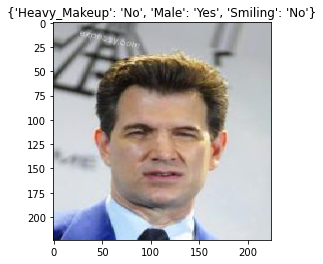

In [12]:
path = '/img_align_celeba/images/000015.jpg' #Predicting on one image
img = image.load_img(path, target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1 , img_width, img_height, 3)
classes = data.columns[1:]

y_pred = model.predict(img)

res = {}
for i in range(y_pred.shape[1]):
    if y_pred[0][i] > 0.70:
        res[classes[i]] = 'Yes'
    else:
        res[classes[i]] = 'No'
        
plt.imshow(img.reshape(img_width, img_height,3))
plt.title(res)
plt.show()

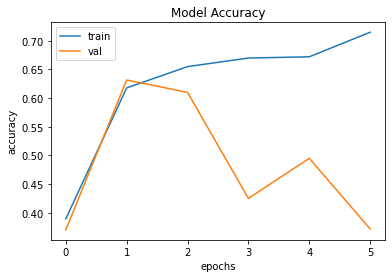

In [13]:
#1. Display (plot) the Training Vs Validation Accuracy of the CNN Model as a line graph using matplotlib.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

It can be noticed that model is not performing good. Let's Check Part-2 where Data augmentation is applied to check model achieve better results or not